In [175]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [176]:
df = pd.read_csv('insurance.csv')

In [177]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Data shows no nulls.

In [179]:
df.duplicated().sum()

1

In [180]:
df=df.drop_duplicates()

In [181]:
df.duplicated().sum()

0

Dropped one duplicate.

In [182]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [183]:
df.region.nunique()

4

In [184]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

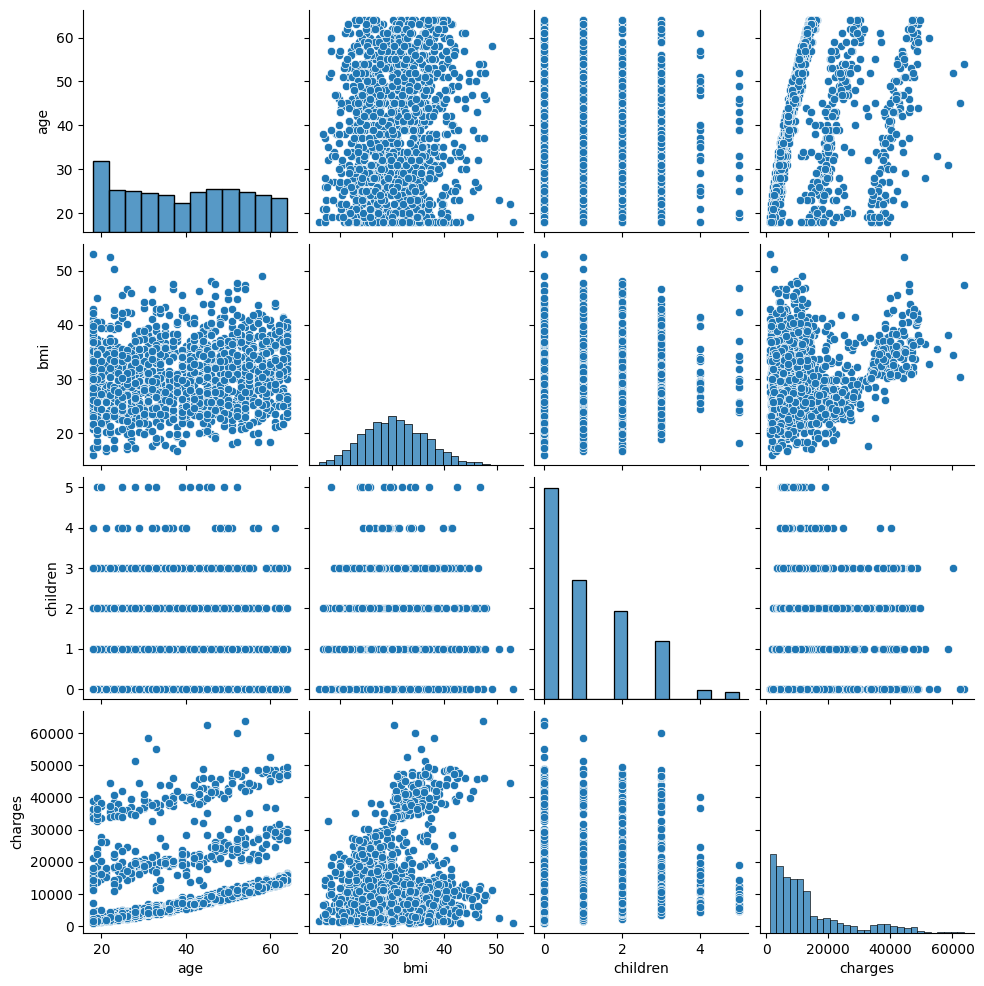

In [185]:
sns.pairplot(df)

In [186]:
heat=df.corr(numeric_only=True)

<Axes: >

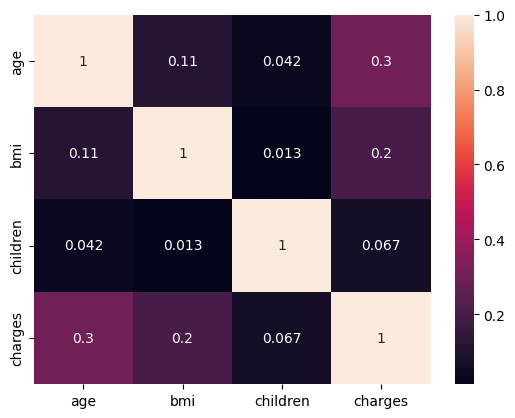

In [187]:
sns.heatmap(heat,annot=True)

In [188]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [189]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [190]:
df.region=df['region'].replace({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})
df.sex=df.sex.replace({'female':1,'male':2})
df.smoker=df.smoker.replace({'yes':1,'no':2})

In [191]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [192]:
heat=df.corr(numeric_only=True)

<Axes: >

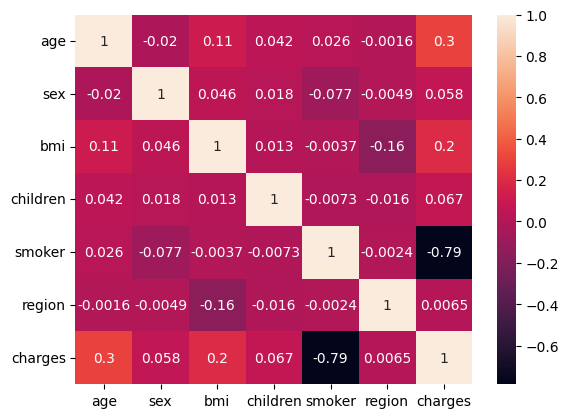

In [193]:
sns.heatmap(heat,annot=True)

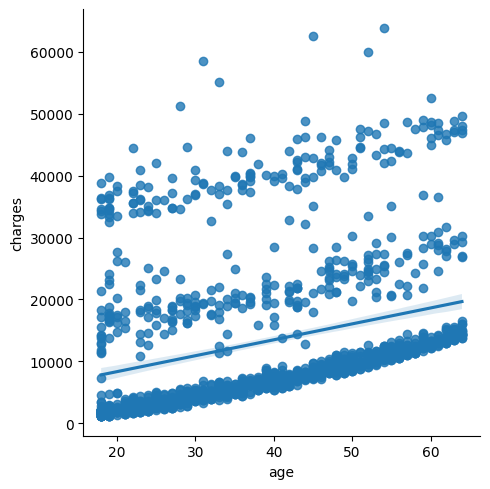

In [194]:
sns.lmplot(x='age',y='charges',data=df)

In [195]:
df.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker     -1.463601
region      0.039068
charges     1.515391
dtype: float64

In [196]:
from scipy.stats import skew


In [197]:
df['charges'] = np.log1p(df['charges'])
# Recalculate skewness to check the effect of transformations
new_skewness_values = df.apply(skew)
print("New skewness values:\n", new_skewness_values)

New skewness values:
 age         0.054719
sex        -0.019447
bmi         0.283596
children    0.936369
smoker     -1.461959
region      0.039024
charges    -0.089458
dtype: float64


In [198]:
x= df.drop(columns='charges')
y=df.charges

In [199]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [200]:
x_train.shape

(1002, 6)

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [202]:
poly= PolynomialFeatures(degree=3)
lin=LinearRegression()

In [203]:
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)

In [204]:
lin.fit(x_train_poly,y_train)

LinearRegression()

In [205]:
y_pred_train=lin.predict(x_train_poly)
y_pred_test=lin.predict(x_test_poly)

In [206]:
mean_absolute_error(y_train,y_pred_train)

0.19560575068299993

In [207]:
mean_absolute_error(y_test,y_pred_test)

0.20164897697319747

In [208]:
lin.score(x_train_poly,y_train)

0.8536579927054245